### Import Libraries

In [1]:
import pickle
import os
import pandas as pd
import enum
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from spear.labeling import PreLabels
import numpy as np
from spear.cage import Cage
from utils import custom_dataset, train_all_LF
from generate_LF import get_variables
from spear.labeling import labeling_function, ABSTAIN, preprocessor, continuous_scorer
import re


In [2]:
from labelling_function import *
from PIL import Image
from resnet18 import ResNet, BasicBlock
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import torchvision.models as models
from resnet18 import ResNet, BasicBlock
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import cv2

### Declaring ClassLabels

In [3]:
ABSTAIN = None

class ClassLabels(enum.Enum):
    LYMPHOCYTE= 0
    NONLYMPHOCYTE = 1
    
    
   

### Defining Labelling Functions

#### LFs for Class 0

In [4]:
from spear.labeling import labeling_function, ABSTAIN, preprocessor, continuous_scorer
import re
# path = "/home/akshit/Desktop/MICCAI/data/models/"
path = "/home/raja/Desktop/MICCAI/data/models/100/"

# SVM
@continuous_scorer()
def svm_V1(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten() # x is 28x28x3 input img 
    svm = pickle.load(open(path+'0_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])
    # print(confidence_scores)
    return float(confidence_scores[0][0]) #only called when model doesn't ABSTAIN, output confidence on class label

@labeling_function(cont_scorer=svm_V1, label=ClassLabels.LYMPHOCYTE)
def LF_svm0_V1(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'0_svm.pkl','rb'))
    
    if svm.predict_proba([x])[0][0]>0.50: 
        return ClassLabels.LYMPHOCYTE # Return label only if confidence > 0.8
    else: 
        return ABSTAIN
    



In [5]:
'''
import torch
import pickle
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_resnet_model(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    return model

def load_image_with_transform(input_img):
    input_img = input_img.copy()
    input_img = Image.fromarray(input_img)

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])

    input_img = transform(input_img)
    input_img = input_img.clone().detach().requires_grad_(True).to(torch.float)

    #input_img = torch.tensor(input_img.clone().detach().requires_grad_(True), dtype=torch.float)
    input_img = input_img.unsqueeze(0).to(device)

    return input_img

model_path = '/home/raja/Desktop/MICCAI/data/models/100/best.pkl'
model = load_resnet_model(model_path)

@labeling_function(label=ClassLabels.NONLYMPHOCYTE)
def ResNet18LF_NONLYMPHOCYTE(x,**kwargs):
    input_image = load_image_with_transform(x)
    output = model(input_image)
    predicted_class = torch.argmax(output, dim=1)
    confidence_scores = torch.nn.functional.softmax(output, dim=1)

    if predicted_class.item() == 1 and confidence_scores[0][1] > 0.65:
        return ClassLabels.NONLYMPHOCYTE
    else:
        return ABSTAIN
'''

"\nimport torch\nimport pickle\nimport numpy as np\n\ndevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')\n\ndef load_resnet_model(model_path):\n    with open(model_path, 'rb') as f:\n        model = pickle.load(f)\n    return model\n\ndef load_image_with_transform(input_img):\n    input_img = input_img.copy()\n    input_img = Image.fromarray(input_img)\n\n    transform = transforms.Compose([\n        transforms.Resize((224, 224)),\n        transforms.ToTensor(),\n        transforms.Normalize(\n            mean=[0.485, 0.456, 0.406],\n            std=[0.229, 0.224, 0.225]\n        )\n    ])\n\n    input_img = transform(input_img)\n    input_img = input_img.clone().detach().requires_grad_(True).to(torch.float)\n\n    #input_img = torch.tensor(input_img.clone().detach().requires_grad_(True), dtype=torch.float)\n    input_img = input_img.unsqueeze(0).to(device)\n\n    return input_img\n\nmodel_path = '/home/raja/Desktop/MICCAI/data/models/100/best.pkl'\nmodel = load_resn

In [6]:
'''
import torch
import pickle
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_resnet_model(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    return model

def load_image_with_transform(input_img):
    input_img = input_img.copy()
    input_img = Image.fromarray(input_img)

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])
#sourceTensor.clone().detach().requires_grad_(True)
    input_img = transform(input_img)
    input_img = input_img.clone().detach().requires_grad_(True).to(torch.float)

    #input_img = torch.tensor(input_img.clone().detach().requires_grad_(True), dtype=torch.float)
    input_img = input_img.unsqueeze(0).to(device)

    return input_img

model_path = '/home/raja/Desktop/MICCAI/data/models/100/best.pkl'
model = load_resnet_model(model_path)

@labeling_function(label=ClassLabels.LYMPHOCYTE)
def ResNet18LF_LYMPHOCYTE(x,**kwargs):
    input_image = load_image_with_transform(x)
    output = model(input_image)
    predicted_class = torch.argmax(output, dim=1)
    confidence_scores = torch.nn.functional.softmax(output, dim=1)

    if predicted_class.item() == 0 and confidence_scores[0][0] > 0.50:
        return ClassLabels.LYMPHOCYTE
    else:
        return ABSTAIN
'''

"\nimport torch\nimport pickle\nimport numpy as np\n\ndevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')\n\ndef load_resnet_model(model_path):\n    with open(model_path, 'rb') as f:\n        model = pickle.load(f)\n    return model\n\ndef load_image_with_transform(input_img):\n    input_img = input_img.copy()\n    input_img = Image.fromarray(input_img)\n\n    transform = transforms.Compose([\n        transforms.Resize((224, 224)),\n        transforms.ToTensor(),\n        transforms.Normalize(\n            mean=[0.485, 0.456, 0.406],\n            std=[0.229, 0.224, 0.225]\n        )\n    ])\n#sourceTensor.clone().detach().requires_grad_(True)\n    input_img = transform(input_img)\n    input_img = input_img.clone().detach().requires_grad_(True).to(torch.float)\n\n    #input_img = torch.tensor(input_img.clone().detach().requires_grad_(True), dtype=torch.float)\n    input_img = input_img.unsqueeze(0).to(device)\n\n    return input_img\n\nmodel_path = '/home/raja/Desktop/

#### LFs for Class 1

In [7]:
# SVM
@continuous_scorer()
def svm1_V1(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten() # x is 28x28x3 input img 
    svm = pickle.load(open(path+'1_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])

    return float(confidence_scores[0][1]) #only called when model doesn't ABSTAIN, output confidence on class label

@labeling_function(cont_scorer=svm1_V1, label=ClassLabels.NONLYMPHOCYTE)
def LF_svm1_V1(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()  
    svm = pickle.load(open(path+'1_svm.pkl','rb'))
    
    if svm.predict_proba([x])[0][1]>0.6: 
        return ClassLabels.NONLYMPHOCYTE
    else: 
        return ABSTAIN


In [8]:
from labelling_function import *

@labeling_function(label=ClassLabels.NONLYMPHOCYTE)
def LFNL1(c,**kwargs): 
    red_score = calculate_brown_score(c)
    blue_score = calculate_blue_score(c)
    green_score = calculate_green_score(c)
    if blue_score > 155:
        return ClassLabels.NONLYMPHOCYTE
    else:
        return ABSTAIN
    
@labeling_function(label=ClassLabels.NONLYMPHOCYTE)
def LFNL2(c,**kwargs): 
    red_score = calculate_brown_score(c)
    blue_score = calculate_blue_score(c)
    if 10 < blue_score < 180 and red_score > 170:
        return ClassLabels.NONLYMPHOCYTE
    else:
        return ABSTAIN    
    
@labeling_function(label=ClassLabels.NONLYMPHOCYTE)
def LFNL9(c,**kwargs): 
    green_score = calculate_green_score(c)
    blue_score = calculate_blue_score(c)
    if 10 < blue_score < 180 and green_score > 155:
        return ClassLabels.NONLYMPHOCYTE
    else:
        return ABSTAIN      
    
@labeling_function(label=ClassLabels.NONLYMPHOCYTE)
def LFNL3(c,**kwargs): 
    brown_score = compute_brown_score(c)
    total_blue_score = compute_blue_score(c)
    if total_blue_score < 10:
        return ClassLabels.NONLYMPHOCYTE
    else:
        return ABSTAIN   


@labeling_function(label=ClassLabels.NONLYMPHOCYTE)
def LFNL4(c,**kwargs): 
    brown_score = compute_brown_score(c)
    total_blue_score = compute_blue_score(c)
    if brown_score > 585:
        return ClassLabels.NONLYMPHOCYTE
    else:
        return ABSTAIN   

@labeling_function(label=ClassLabels.NONLYMPHOCYTE)
def LFNL5(c,**kwargs): 
    red_score = calculate_brown_score(c)
    blue_score = calculate_blue_score(c)
    green_score = calculate_green_score(c)
    if red_score > 170:
        return ClassLabels.NONLYMPHOCYTE
    else:
        return ABSTAIN


@labeling_function(label=ClassLabels.NONLYMPHOCYTE)
def LFNL6(c,**kwargs): 
    red_score = calculate_brown_score(c)
    blue_score = calculate_blue_score(c)
    green_score = calculate_green_score(c)
    if red_score < 12:
        return ClassLabels.NONLYMPHOCYTE
    else:
        return ABSTAIN

@labeling_function(label=ClassLabels.NONLYMPHOCYTE)
def LFNL7(c,**kwargs): 
    red_score = calculate_brown_score(c)
    blue_score = calculate_blue_score(c)
    green_score = calculate_green_score(c)
    if green_score > 155:
        return ClassLabels.NONLYMPHOCYTE
    else:
        return ABSTAIN

@labeling_function(label=ClassLabels.NONLYMPHOCYTE)
def LFNL8(c,**kwargs): 
    black_score = compute_black_score(c)
    if black_score > 9:
        return ClassLabels.NONLYMPHOCYTE
    else:
        return ABSTAIN           

    
                 

## Aggregating LFs & Labelling dataset 

### LFSet
Placeholder for declared LFs

In [9]:
from spear.labeling import LFSet

LFS = [
    #ResNet18LF_LYMPHOCYTE,
    #ResNet18LF_NONLYMPHOCYTE,
    LFNL1,
    LFNL2,
    LFNL3,
    LFNL4,
    LFNL5,
    #LFNL6,
    LFNL7,
    LFNL8,
    LFNL9,
    
    LF_svm0_V1,
    LF_svm1_V1,  
  
]

QT2 = 0.99#np.array([0.9999,0.9999,0.9999,0.9999,0.77,0.9999,0.9999,0.9999,0.9999, 0.9999, 0.001,0.9999])
QC2 = 0.99

qt1 = np.array([0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999])
qc1 = np.array([0.99999,0.99999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999])

rules = LFSet("BM_LF")
rules.add_lf_list(LFS)

### Load the dataset

In [10]:
from utils import custom_dataset, train_all_LF
from generate_LF import get_variables
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

classes,label_frac,data_path,save_path = get_variables()
dataset,x,y = custom_dataset(classes=classes,path=data_path ,fraction=label_frac)



2023-06-09 14:08:55.750644: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 14:08:55.828385: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-09 14:08:56.159746: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/raja/Desktop/cage/lib/python3.10/site-packages/cv2/../../lib64:
2023-06-09 14:08:56.159784: 

## Cage

In [11]:
def cage_loop(LFS, max_iters=10, threshold=10**-5, img_per_class = 150):
    from keras.utils import np_utils
    # Paths
    log_path_cage = './cage_loop/log.txt' 
    params_path = None
    path_json = "./cage_loop/labels.json"
    U_path_pkl = "./cage_loop/unlabelled.pkl"
    L_path_pkl = "./cage_loop/labelled.pkl"

    # Loading Data
    classes,label_frac,data_path,save_path = get_variables()
    print("Classes used in expt:",classes)
    dataset,x,y = custom_dataset(classes=classes, path=data_path, fraction=label_frac)

    xu = np.array(dataset['test_images'])
    yu = np.array(dataset['test_labels'])
    print(np.shape(xu),np.shape(yu))
    # Creating rules
    n_lfs = len(LFS)
    rules = LFSet("BM_LF")
    rules.add_lf_list(LFS)
    
    confidence_list = []
    val_scores = []

    for i in range(max_iters):
        # Train Models in LFs
        train_all_LF(x,y,len(classes),save_path,label_frac)

        # Unlabelled
        u_noisy_labels = PreLabels(name="bmnist_rem_ul",
                                    data=xu,
                                    rules=rules,
                                    labels_enum=ClassLabels,
                                    num_classes=len(classes))
        # Lu,Su = u_noisy_labels.get_labels()
        u_noisy_labels.generate_pickle(U_path_pkl)

        # Labelled
        l_noisy_labels = PreLabels(name="bmnist_l",
                                    data=x,
                                    gold_labels=y,
                                    rules=rules,
                                    labels_enum=ClassLabels,
                                    num_classes=len(classes))
        # Ll,Sl = l_noisy_labels.get_labels()
        l_noisy_labels.generate_pickle(L_path_pkl)
        l_noisy_labels.generate_json(path_json)


        # Cage
        cage = Cage(path_json = path_json, n_lfs = n_lfs)
        if params_path is not None: 
            cage.load_params(load_path = params_path)
        else:
            params_path = './cage_loop/params.pkl' 
        
        probs = cage.fit_and_predict_proba(path_pkl = U_path_pkl, path_test = L_path_pkl, path_log = log_path_cage, qt = QT2, qc = QC2, metric_avg = ['macro'], n_epochs = 100, lr = 0.01)
        labels = np.argmax(probs, 1)

        print(labels)

        values, frequency = np.unique(yu, return_counts=True)
        for values, frequency in zip(values, frequency):
            print(f"Labels of Lake Class {values}: {frequency}")

        values, frequency = np.unique(y, return_counts=True)
        for values, frequency in zip(values, frequency):
            print(f"Labels of Labelled Set {values}: {frequency}")
        
        print("="*45)
        print("Iteration",i)
        print("Shape of Labeled Data:",x.shape)
        print("Shape of Unlabeled Data:",xu.shape)
        print("Accuracy on unlabelled images:",accuracy_score(labels,yu)*100)
        print("="*45)
        
        cage.save_params(save_path = params_path)

        confidence = np.array([np.max(i) for i in probs])
        confidence_list.append(confidence)
        print(i,probs.shape)

        # Getting indices of probabilities in decreasing order
        idx = np.argsort(confidence)
        idx = idx[::-1] 

        # Number of images per class (5%)
        # img_per_class = int(0.05*len(confidence)/len(classes))

        # Number of images per class (50)
        
        
        print("Num img per class =",img_per_class)

        pop_list = [] #list of indices of images to be added
        label_count = []

        for j in idx:
            if confidence[j]>threshold and label_count.count(labels[j])<img_per_class:
                pop_list.append(j)
                label_count.append(labels[j])
        
        print("Number of images getting transferred:", len(pop_list))
        print('Accuracy of Pseudo-labelled img added to dataset:', accuracy_score(labels[pop_list],yu[pop_list])*100)
        
        x = np.append(x,xu[pop_list], axis=0)
        y = np.append(y,labels[pop_list], axis=0)        
        xu = np.delete(xu,pop_list, axis=0)
        yu = np.delete(yu,pop_list, axis=0)

        if len(pop_list)<5:
            break

        # Deleting variables
        del u_noisy_labels
        del l_noisy_labels
        del cage

        classes,label_frac,data_path,save_path = get_variables()


    return x,y,xu,yu,confidence_list


In [12]:
#  img_per_class: num images added per loop per class
x,y,xu,yu,confidence_list = cage_loop(LFS, max_iters=1, threshold=10**-10,  img_per_class = 10)

Classes used in expt: [0, 1]
(2, 30, 30, 3) (2,)


/home/raja/Desktop/cage/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Trained & Saved 6 models


/home/raja/Desktop/cage/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Trained & Saved 6 models


100%|██████████| 100/100 [00:02<00:00, 44.93it/s]

final_test_accuracy_score: 0.9476190476190476
test_average_metric: macro	final_test_f1_score: 0.947560781821071
[0 1]
Labels of Lake Class 0: 1
Labels of Lake Class 1: 1
Labels of Labelled Set 0: 105
Labels of Labelled Set 1: 105
Iteration 0
Shape of Labeled Data: (210, 30, 30, 3)
Shape of Unlabeled Data: (2, 30, 30, 3)
Accuracy on unlabelled images: 100.0
0 (2, 2)
Num img per class = 10
Number of images getting transferred: 2
Accuracy of Pseudo-labelled img added to dataset: 100.0


In [13]:
confidence_list

[array([1.22869632e-03, 1.57605156e-05])]

In [14]:
import os
import imageio
import numpy as np
from skimage.transform import resize

image_folder = '/home/raja/Desktop/MICCAI/training_folder'

image_folder = '/home/raja/Desktop/segment-anything/output/NONLYM'
#image_folder = '/home/raja/Desktop/segment-anything/output/TRAIN/LYMPHOCYTES'
image_files = os.listdir(image_folder)

image_data = []
image_names = []
for file in image_files:
    image_path = os.path.join(image_folder, file)
    image = imageio.imread(image_path)
    resized_image = resize(image, (30, 30, 3))
    image_data.append(resized_image)
    image_names.append(file)

xuu = (np.array(image_data) * 255).astype(np.uint8)

print(xuu.shape)  # (num_images, 30, 30, 3)
#print(image_names)  # list of image file names in the same order as x


/tmp/ipykernel_118448/148317891.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


(564, 30, 30, 3)


In [15]:

from keras.utils import np_utils
# Paths
log_path_cage = './cage_loop/log.txt' 
params_path = None
path_json = "./cage_loop/labels.json"
U_path_pkl = "./cage_loop/unlabelled.pkl"
L_path_pkl = "./cage_loop/labelled.pkl"

# Loading Data
classes,label_frac,data_path,save_path = get_variables()
#print("Classes used in expt:",classes)
dataset,x,y = custom_dataset(classes=classes, path=data_path, fraction=label_frac)
xu = np.array(dataset['test_images'])

# Unlabelled
u_noisy_labels = PreLabels(name="bmnist_rem_ul",
                            data=xuu,
                            rules=rules,
                            labels_enum=ClassLabels,
                            num_classes=len(classes))
# Lu,Su = u_noisy_labels.get_labels()
u_noisy_labels.generate_pickle(U_path_pkl)

# Labelled
l_noisy_labels = PreLabels(name="bmnist_l",
                            data=x,
                            gold_labels=y,
                            rules=rules,
                            labels_enum=ClassLabels,
                            num_classes=len(classes))
# Ll,Sl = l_noisy_labels.get_labels()
l_noisy_labels.generate_pickle(L_path_pkl)
l_noisy_labels.generate_json(path_json)




#print(np.shape(xuu))
# Creating rules
n_lfs = len(LFS)
rules = LFSet("BM_LF")
rules.add_lf_list(LFS)

# Cage
cage = Cage(path_json = path_json, n_lfs = n_lfs)
if params_path is not None: 
    cage.load_params(load_path = params_path)
else:
    params_path = './cage_loop/params.pkl' 
probs = cage.fit_and_predict_proba(path_pkl = U_path_pkl, path_test = L_path_pkl, path_log = log_path_cage, qt = QT2, qc = QC2, metric_avg = ['macro'], n_epochs = 100, lr = 0.01)

#probs = cage.fit_and_predict_proba(path_pkl = U_path_pkl, path_test = L_path_pkl, path_log = log_path_cage, qt = 0.9, qc = 0.85, metric_avg = ['macro'], n_epochs = 100, lr = 0.01)
labels = np.argmax(probs, 1)

print(labels)

# Define the file path to save the probabilities
probs_file_path = '/home/raja/Desktop/MICCAI/probs.txt'

# Save the probabilities to the text file
np.savetxt(probs_file_path, probs)






100%|██████████| 100/100 [00:01<00:00, 53.57it/s]


final_test_accuracy_score: 0.9619047619047619
test_average_metric: macro	final_test_f1_score: 0.9618909354867979
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0

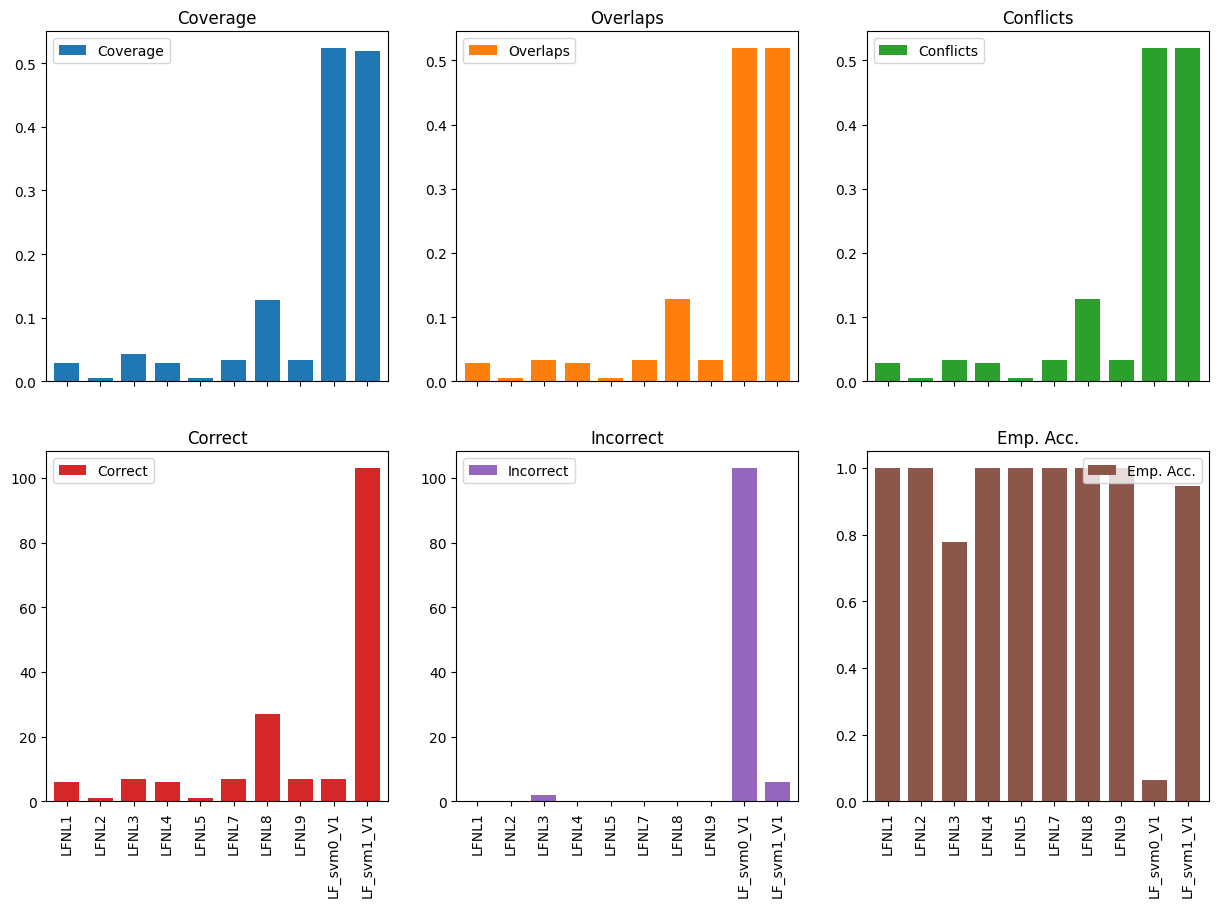

,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.
LFNL1,"[-1.0, 1.0]",0.028571,0.028571,0.028571,6,0,1.000000
LFNL2,"[-1.0, 1.0]",0.004762,0.004762,0.004762,1,0,1.000000
LFNL3,"[-1.0, 1.0]",0.042857,0.033333,0.033333,7,2,0.777778
LFNL4,"[-1.0, 1.0]",0.028571,0.028571,0.028571,6,0,1.000000
LFNL5,"[-1.0, 1.0]",0.004762,0.004762,0.004762,1,0,1.000000
LFNL7,"[-1.0, 1.0]",0.033333,0.033333,0.033333,7,0,1.000000
LFNL8,"[-1.0, 1.0]",0.128571,0.128571,0.128571,27,0,1.000000
LFNL9,"[-1.0, 1.0]",0.033333,0.033333,0.033333,7,0,1.000000
LF_svm0_V1,"[-1.0, 0.0]",0.523810,0.519048,0.519048,7,103,0.063636
LF_svm1_V1,"[-1.0, 1.0]",0.519048,0.519048,0.519048,103,6,0.944954


In [16]:
from spear.labeling import LFAnalysis

analyse = l_noisy_labels.analyse_lfs(plot=True)

result = analyse.head(16)

display(result)

In [17]:
import os
import imageio
import numpy as np
from skimage.transform import resize

image_folder = '/home/raja/Desktop/MICCAI/test_folder'

#image_folder = '/home/raja/Desktop/segment-anything/output/NONLYM'
#image_folder = '/home/raja/Desktop/segment-anything/output/TRAIN/LYMPHOCYTES'
image_files = os.listdir(image_folder)

image_data = []
image_names = []
for file in image_files:
    image_path = os.path.join(image_folder, file)
    image = imageio.imread(image_path)
    resized_image = resize(image, (30, 30, 3))
    image_data.append(resized_image)
    image_names.append(file)

xuu = (np.array(image_data) * 255).astype(np.uint8)

print(xuu.shape)  # (num_images, 30, 30, 3)
#print(image_names)  # list of image file names in the same order as x


/tmp/ipykernel_118448/1530542732.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


(46376, 30, 30, 3)


In [18]:
from keras.utils import np_utils
# Paths
log_path_cage = './cage_loop/log.txt' 
params_path = None
path_json = "./cage_loop/labels.json"
U_path_pkl = "./cage_loop/unlabelled.pkl"
L_path_pkl = "./cage_loop/labelled.pkl"

# Loading Data
classes,label_frac,data_path,save_path = get_variables()
#print("Classes used in expt:",classes)
dataset,x,y = custom_dataset(classes=classes, path=data_path, fraction=label_frac)
xu = np.array(dataset['test_images'])

# Unlabelled
u_noisy_labels = PreLabels(name="bmnist_rem_ul",
                            data=xuu,
                            rules=rules,
                            labels_enum=ClassLabels,
                            num_classes=len(classes))
# Lu,Su = u_noisy_labels.get_labels()
u_noisy_labels.generate_pickle(U_path_pkl)

# Labelled
l_noisy_labels = PreLabels(name="bmnist_l",
                            data=x,
                            gold_labels=y,
                            rules=rules,
                            labels_enum=ClassLabels,
                            num_classes=len(classes))
# Ll,Sl = l_noisy_labels.get_labels()
l_noisy_labels.generate_pickle(L_path_pkl)
l_noisy_labels.generate_json(path_json)




#print(np.shape(xuu))
# Creating rules
n_lfs = len(LFS)
rules = LFSet("BM_LF")
rules.add_lf_list(LFS)

# Cage
cage = Cage(path_json = path_json, n_lfs = n_lfs)
if params_path is not None: 
    cage.load_params(load_path = params_path)
else:
    params_path = './cage_loop/params.pkl' 

probs = cage.fit_and_predict_proba(path_pkl = U_path_pkl, path_test = L_path_pkl, path_log = log_path_cage, qt = QT2, qc = QC2, metric_avg = ['macro'], n_epochs = 100, lr = 0.01)    
#probs = cage.predict_proba(path_test = U_path_pkl, qc = QC2)    
labels = np.argmax(probs, 1)

100%|██████████| 100/100 [00:01<00:00, 52.77it/s]

final_test_accuracy_score: 0.9619047619047619
test_average_metric: macro	final_test_f1_score: 0.9618909354867979


In [19]:
len(labels)

46376

In [20]:
labels

array([1, 1, 1, ..., 1, 1, 0])

In [21]:
import csv

# Combine image names and predicted labels
data = zip(image_names, labels)

# Write to CSV file
with open('/home/raja/Desktop/MICCAI/predictions-train-SVM-HF-cage-test.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Image Name', 'Label'])
    for row in data:
        writer.writerow(row)

In [22]:
import csv
from collections import defaultdict
import re
# Initialize a dictionary to store the counts
counts = defaultdict(int)

# Read the CSV file and populate the counts dictionary
with open('/home/raja/Desktop/MICCAI/predictions-train-SVM-HF-cage-test.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row if present

    # Iterate over the rows in the CSV
    for row in reader:
        image_name = row[0]
        label = int(row[1])

        # Extract the image number
        match = re.search(r'img_(\d+)', image_name)
        if match:
            image_number = int(match.group(1))

            # Check if the label is 0
            if label == 0:
                counts[image_number] += 1

# Add missing image numbers with count 0
for image_number in range(18000, 20000):
    if image_number not in counts:
        counts[image_number] = 0

# Write the counts to a new CSV file
with open('/home/raja/Desktop/MICCAI/image_counts.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['img_number', 'count'])  # Write header row

    # Write the image numbers and counts
    for image_number, count in sorted(counts.items()):
        writer.writerow([image_number, count])

print("CSV file 'image_counts.csv' has been created.")


CSV file 'image_counts.csv' has been created.


In [23]:
'''
import pandas as pd

# read the csv file into a pandas DataFrame
df = pd.read_csv('/home/raja/Desktop/MICCAI/output-train-final-SVM-HF-test.csv')

# create a new DataFrame with the full range of image numbers
img_range = range(2000)
new_df = pd.DataFrame({'Image': ['img_' + str(i) for i in img_range], 'Predicted-Lymphocyte': 0})

# merge the new DataFrame with the original DataFrame using a left join
merged_df = pd.merge(new_df, df, on='Image', how='left')


# write the merged DataFrame to a new csv file
merged_df.to_csv('/home/raja/Desktop/MICCAI/new_file-itr2-prob.csv', index=False)

# Load the Excel file
df = pd.read_csv('/home/raja/Desktop/MICCAI/new_file-itr2-prob.csv')

# Fill the 'predicted' column with 0 for NA values
df['Predicted-Lymphocyte_y'].fillna(0, inplace=True)

# Save the modified DataFrame back to Excel
df.to_csv('/home/raja/Desktop/MICCAI/new_file-itr2-prob.csv', index=False)
'''

"\nimport pandas as pd\n\n# read the csv file into a pandas DataFrame\ndf = pd.read_csv('/home/raja/Desktop/MICCAI/output-train-final-SVM-HF-test.csv')\n\n# create a new DataFrame with the full range of image numbers\nimg_range = range(2000)\nnew_df = pd.DataFrame({'Image': ['img_' + str(i) for i in img_range], 'Predicted-Lymphocyte': 0})\n\n# merge the new DataFrame with the original DataFrame using a left join\nmerged_df = pd.merge(new_df, df, on='Image', how='left')\n\n\n# write the merged DataFrame to a new csv file\nmerged_df.to_csv('/home/raja/Desktop/MICCAI/new_file-itr2-prob.csv', index=False)\n\n# Load the Excel file\ndf = pd.read_csv('/home/raja/Desktop/MICCAI/new_file-itr2-prob.csv')\n\n# Fill the 'predicted' column with 0 for NA values\ndf['Predicted-Lymphocyte_y'].fillna(0, inplace=True)\n\n# Save the modified DataFrame back to Excel\ndf.to_csv('/home/raja/Desktop/MICCAI/new_file-itr2-prob.csv', index=False)\n"

In [24]:
'''
import pandas as pd

# read the input CSV file into a pandas dataframe
df = pd.read_csv('/home/raja/Desktop/MICCAI/new_file-SVM-HF.csv')

# define the function to assign class labels based on ground truth values
def assign_class(gt):
    if gt == 0:
        return '0 (No lymphocytes)'
    elif 1 <= gt <= 5:
        return '1-5'
    elif 6 <= gt <= 10:
        return '6-10'
    elif 11 <= gt <= 20:
        return '11-20'
    elif 21 <= gt <= 50:
        return '21-50'
    elif 51 <= gt <= 200:
        return '51-200'
    else:
        return '>200'

# assign class labels to ground truth values
df['Ground-truth Class'] = df['Ground-truth'].apply(assign_class)

# assign class labels to predicted values based on the constraints
df['Predicted Class'] = df.apply(lambda row: assign_class(row['Predicted-Lymphocyte_y']), axis=1)

# calculate the confusion matrix
confusion_matrix = pd.crosstab(df['Ground-truth Class'], df['Predicted Class'])

# define the desired order of the classes
desired_order = ['0 (No lymphocytes)', '1-5', '6-10', '11-20', '21-50']

# reindex the confusion matrix to match the desired order
confusion_matrix = confusion_matrix.reindex(index=desired_order, columns=desired_order, fill_value=0)

# print the confusion matrix
print(confusion_matrix)

'''


"\nimport pandas as pd\n\n# read the input CSV file into a pandas dataframe\ndf = pd.read_csv('/home/raja/Desktop/MICCAI/new_file-SVM-HF.csv')\n\n# define the function to assign class labels based on ground truth values\ndef assign_class(gt):\n    if gt == 0:\n        return '0 (No lymphocytes)'\n    elif 1 <= gt <= 5:\n        return '1-5'\n    elif 6 <= gt <= 10:\n        return '6-10'\n    elif 11 <= gt <= 20:\n        return '11-20'\n    elif 21 <= gt <= 50:\n        return '21-50'\n    elif 51 <= gt <= 200:\n        return '51-200'\n    else:\n        return '>200'\n\n# assign class labels to ground truth values\ndf['Ground-truth Class'] = df['Ground-truth'].apply(assign_class)\n\n# assign class labels to predicted values based on the constraints\ndf['Predicted Class'] = df.apply(lambda row: assign_class(row['Predicted-Lymphocyte_y']), axis=1)\n\n# calculate the confusion matrix\nconfusion_matrix = pd.crosstab(df['Ground-truth Class'], df['Predicted Class'])\n\n# define the desire